# Import the required libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Dataset

In [30]:
wine = load_wine(as_frame=True)
X = pd.DataFrame(wine.data, columns = wine.feature_names)
y = pd.DataFrame(wine.target, columns = ['target'])

df = wine.frame

print("The data is loaded!")

The data is loaded!


# Split the Dataset

In [31]:
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 42, stratify = y)

print("The data is splitted among the training set ( 80% ) and the testing set ( 20% ).")

The data is splitted among the training set ( 80% ) and the testing set ( 20% ).


# Exploratory Data Analysis

In [32]:
print(X.shape)

(178, 13)


In [33]:
print(X.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [34]:
print(X.describe)

<bound method NDFrame.describe of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  

In [35]:
print(y)

     target
0         0
1         0
2         0
3         0
4         0
..      ...
173       2
174       2
175       2
176       2
177       2

[178 rows x 1 columns]


In [36]:
print(X.columns)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


In [37]:
print(y['target'].value_counts())

target
1    71
0    59
2    48
Name: count, dtype: int64


In [38]:
print(X[['alcohol','malic_acid','ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline' ]].value_counts())

alcohol  malic_acid  ash   alcalinity_of_ash  magnesium  total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  hue   od280/od315_of_diluted_wines  proline
11.03    1.51        2.20  21.5               85.0       2.46           2.17        0.52                  2.01             1.90             1.71  2.87                          407.0      1
13.68    1.83        2.36  17.2               104.0      2.42           2.69        0.42                  1.97             3.84             1.23  2.87                          990.0      1
13.40    3.91        2.48  23.0               102.0      1.80           0.75        0.43                  1.41             7.30             0.70  1.56                          750.0      1
         4.60        2.86  25.0               112.0      1.98           0.96        0.27                  1.11             8.50             0.67  1.92                          630.0      1
13.41    3.84        2.12  18.8               90.0       2.4

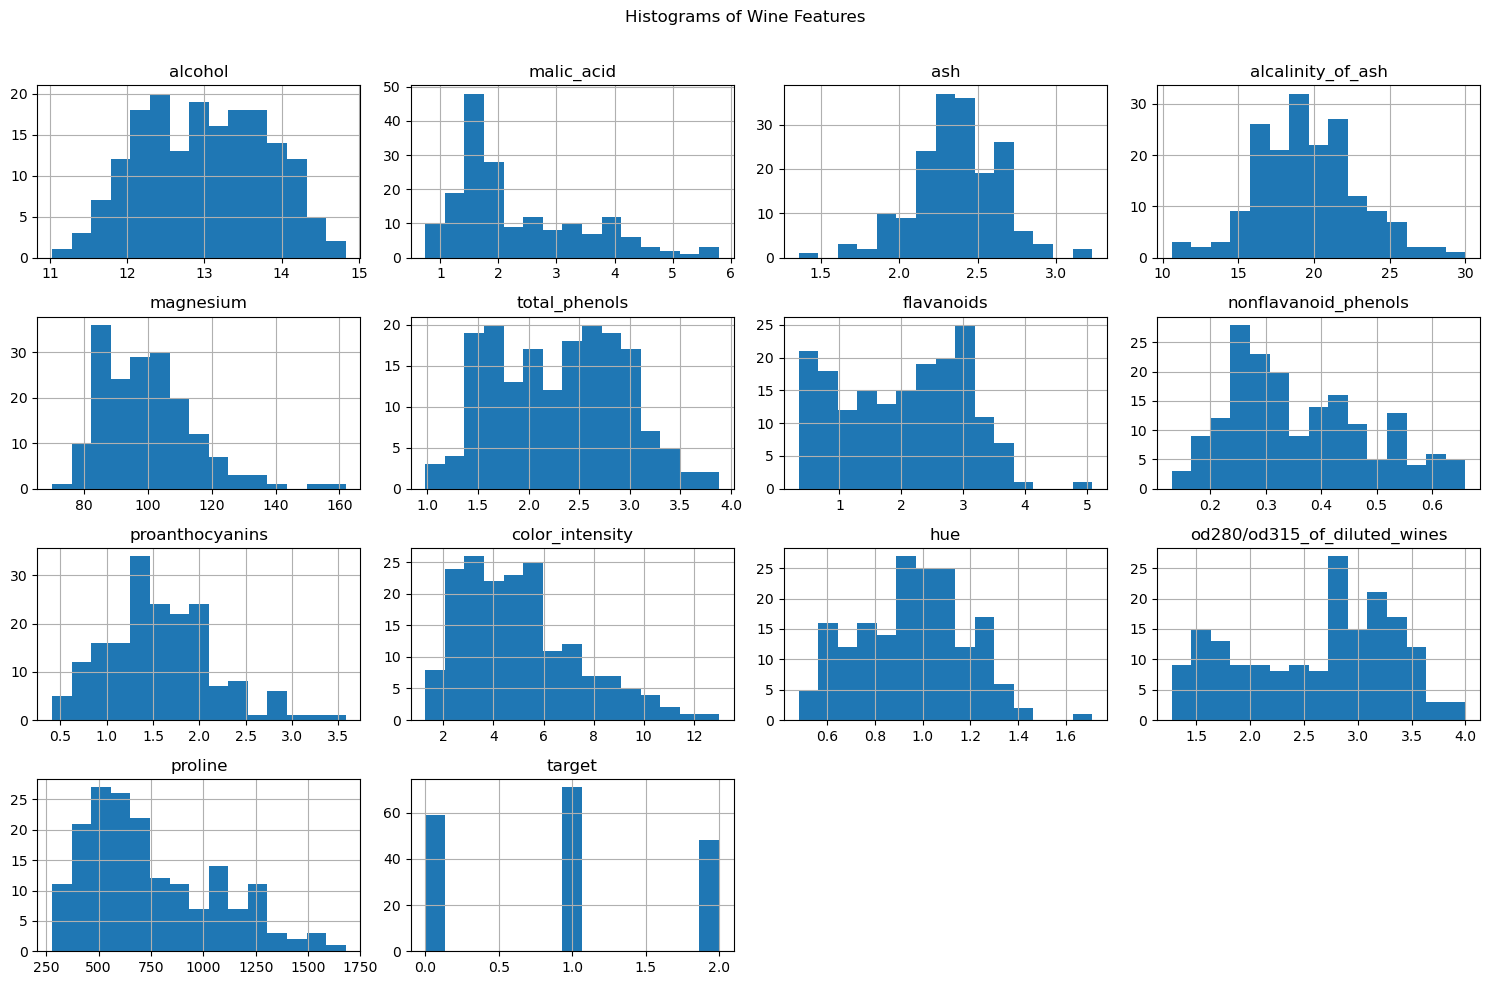

In [41]:
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of Wine Features')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

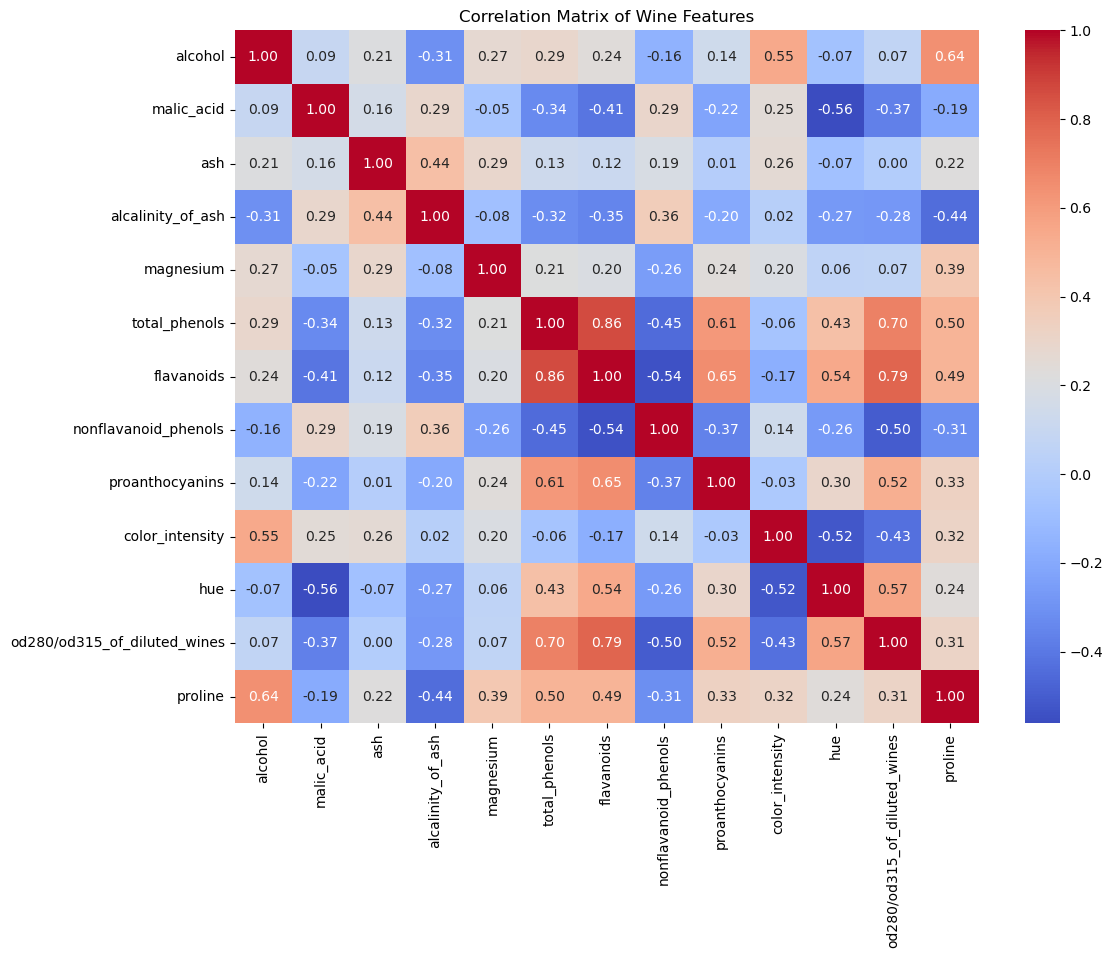

In [44]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Features')
plt.show()

# Scaling the dataset

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying the model

In [61]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_scaled, y_train)

pred = knn.predict(X_test_scaled)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [62]:
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy score of KNN Model: {accuracy:.4f}")

Accuracy score of KNN Model: 1.0000


In [63]:
print("Classification report of KNN Model:\n", classification_report(y_test, pred, target_names = wine.target_names))

Classification report of KNN Model:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



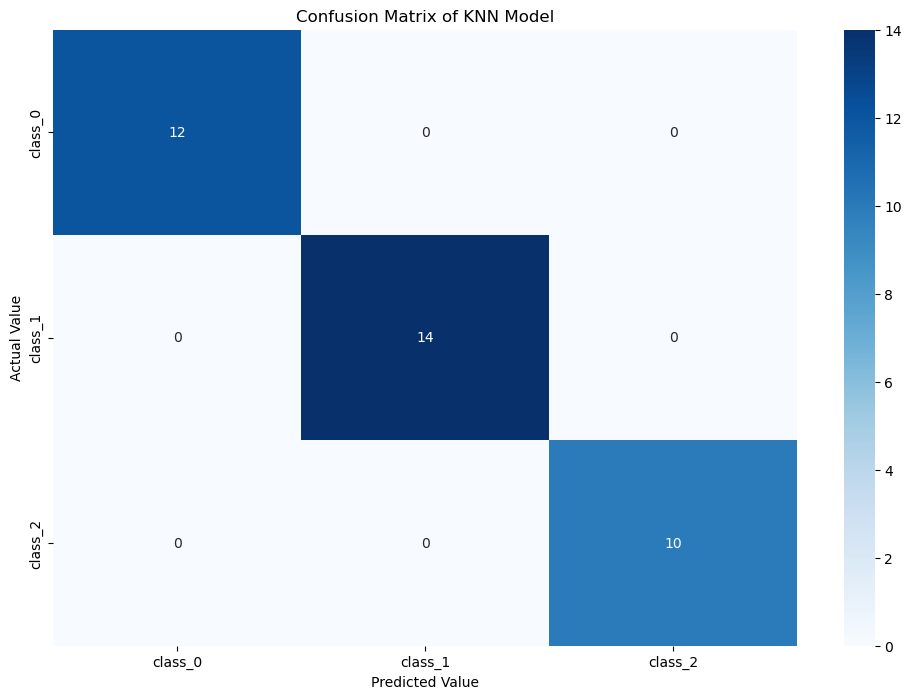

In [66]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize = (12,8))
sns.heatmap(cm, xticklabels = wine.target_names, yticklabels = wine.target_names, annot=True, cmap = 'Blues')
plt.title("Confusion Matrix of KNN Model")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

plt.show()